# Árvores de Decisão

Seção 8 do **Introduction to Statistical Learning**.

### Exemplo

- Imagine que eu sempre jogo tênis aos sábados e convido um amigo para vir comigo.
- As vezes ele vem, as vezes não.
- Para ele, ir ao jogo depende de uma série de fatores: clima, temperatura, umidade, vento, etc.
- Eu começo a tomar nota dos dias em que o mesmo aparece e como tais variáveis estão.

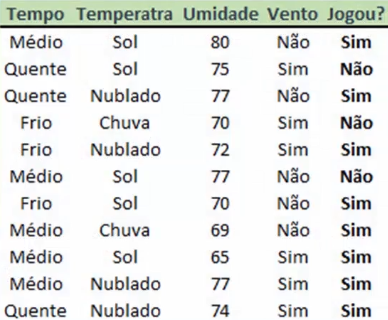

In [1]:
from IPython.display import Image
Image('../img/dataset_tenis.png')

Eu quero usar esses dados para predizer se o mesmo jogará ou não.

Uma forma intuitiva de se fazer isso é criar uma **árvore de decisão**.

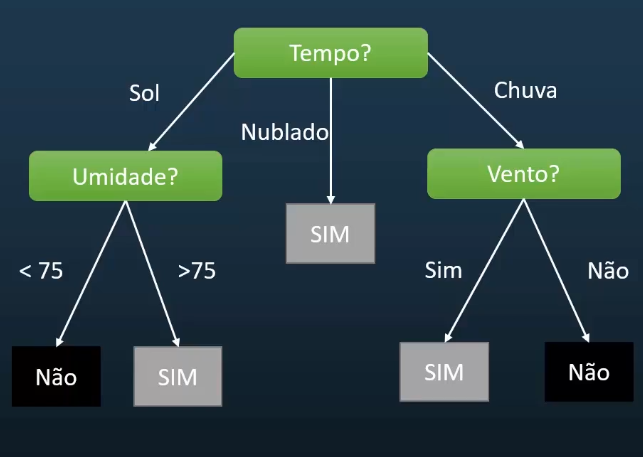

In [2]:
Image('../img/arvore_decisao.png')

**Nomenclatura**

**Nós**: Divide a árvore por um valor de um certo atributo.

**Ramos**: Saída de um nó

**Raíz**: Nó que faz a primeira divisão.

**Folhas**: Nó final, que toma a decisão.

### Como funciona

Entropia e ganho de informação são as bases matemáticas para escolher a melhor divisão. O algoritmo fará a divisão sempre na classe que apresentar o maior "ganho de informação".

**Problema**: Essas árvores são muito sucessíveis ao **overfitting**, quando se encaixam bem de mais no conjunto de treino.

### Solução: Florestas Aleatórias

Podemos criar árvores usando divisões diferentes do conjunto de dados.

Para melhorar o desempenho das árvores de decisão, podemos também usar amostragens **aleatórias** de escolhas de parâmetros para divisão:

- Um novo conjunto de parâmetros é escolhido aleatoriamente para cada árvore a cada divisão da mesma.
- O algoritmo escolhe 1 dentre "m" parâmetros.
- Para classificação, normalmente usamos "m" como a raiz de "p".

**Qual o ponto?**

Supondo que exista um parâmetro muito forte. Quando usamos o processo normal de construção de árvores, a maioria das árvores usarão o mesmo parâmetro como raiz, o que resultará em árvores **muito correlacionadas**.

Tornando o processo de escolha de nós estocástico, nossas florestas aleatórias serão descorrelacionadas e isso resultará na redução da variância do modelo.

### Árvores de Decisão no Python

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('kyphosis.csv')

In [5]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


### Análise Exploratória de Dados

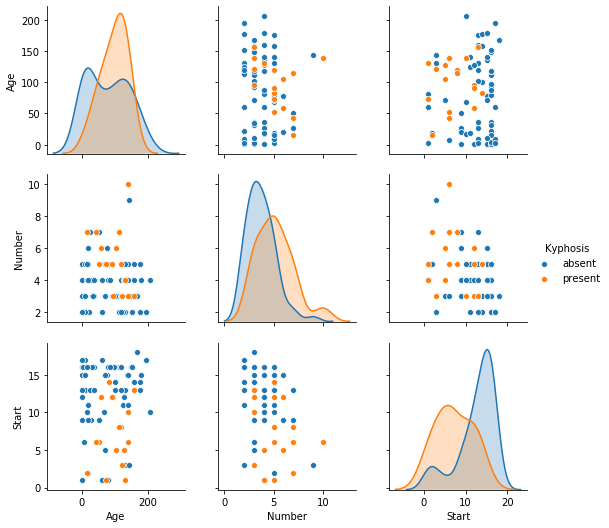

In [7]:
sns.pairplot(df, hue='Kyphosis')

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
dtree = DecisionTreeClassifier()

In [16]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [17]:
pred = dtree.predict(X_test)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      absent       0.89      0.84      0.86        19
     present       0.57      0.67      0.62         6

    accuracy                           0.80        25
   macro avg       0.73      0.75      0.74        25
weighted avg       0.81      0.80      0.80        25



In [20]:
print(confusion_matrix(y_test, pred))

[[16  3]
 [ 2  4]]


#### Floresta Aleatória

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rfc = RandomForestClassifier(n_estimators=200) # criando floresta com 200 arvores aleatorias

In [23]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
rfc_pred = rfc.predict(X_test)

In [26]:
print(classification_report(y_test, pred))
print('\n')
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

      absent       0.89      0.84      0.86        19
     present       0.57      0.67      0.62         6

    accuracy                           0.80        25
   macro avg       0.73      0.75      0.74        25
weighted avg       0.81      0.80      0.80        25



              precision    recall  f1-score   support

      absent       0.84      0.84      0.84        19
     present       0.50      0.50      0.50         6

    accuracy                           0.76        25
   macro avg       0.67      0.67      0.67        25
weighted avg       0.76      0.76      0.76        25



In [27]:
print(confusion_matrix(y_test, pred))
print('\n')
print(confusion_matrix(y_test, rfc_pred))

[[16  3]
 [ 2  4]]


[[16  3]
 [ 3  3]]
